In [1]:
import math

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
#1.1 Lois discretes

In [5]:
# Loi de Poisson
#
# Les Paramètres
#    k : un entier naturel.
#    L : une valeur folttant de lambda, Le paramètre de la loi de Poisson.
#
# Returne
#    Une valeur flottante, probabilité que k événements se produisent pour un temps lambda donné.

In [6]:
def loi_poisson(k, L):
    return math.e**(-L) * (L**k)/math.factorial(k)

In [7]:
# Loi Binomiale
#
# Les paramètres
#    k : un entier naturel.
#    n : un entier, nombre d'essais à réaliser.
#    p : une valeur folttant, probabilité de succès.
#
# Retournee
#    Une valeur folttante, probabilité de k succès pour n expérience.

In [8]:
def loi_binomial(k, n, p):
    return math.comb(n, k)*(p**k)*((1-p)**(n-k))

In [9]:
#1.2 Lois continues

In [10]:
#Loi Normale

# Les paramètres
#    x : une valeur flottante quelconque
#    mu : une valeur flottante, Espérance.
#    sigma : une valeur flottante, Variance.

#Returne
#    Une valeur flottante, la probabilité que l'événement x se réalise en suivant la loi normale.


In [11]:
def loi_normal(x, mu, sigma):
    return (math.exp((-1/2)*((x-mu)/sigma)**2))/(sigma * math.sqrt(2*math.pi))

In [12]:
#Loi Exponentielle

# Les paramètres
#    x : une valeur flottante quelconque
#    L: une valeur flottante de lambda, parametre de la loi exponentielle
#    sigma : FLOAT, Variance.

#Returne
#    La probabilité que l'événement x se réalise en suivant la loi exponentielle.


In [13]:
def loi_exponential(x, L): 
    return L * math.e**(-L*x)

In [14]:
#2.1 Temps de reaction

In [15]:
# Coef de la loi de student en utilisant la table pour les pourcentages donnee

# Les paramètres
#    taille_echantillon : valeur INT, Taille de l'échantillon mesuré.
#    pourcent99 : valeur BOOLEAN, Si vrai, défini l'intervalle de confiance à 99%.

#Returne
#    r : une valeur flottante, Le coefficient correspondant aux paramètres voulu.

In [16]:
def student(pourcent99): #valeur pour 25 conducteur soit 24 dans les tables
    if(pourcent99):
        r = 2.797  # 1-a = 0.99 <=> a = 1-0.99 = 0.01

    else:
        r = 2.0639  # 1-a = 0.95 <=> a = 1-0.95 = 0.05
    return r

In [17]:
def fractile(pourcent99): 
    if(pourcent99): 
        r = 2.3263  # 1-a = 0.99 <=> a = 1-0.99 = 0.01

    else:           
        r = 1.6449  # 1-a = 0.95 <=> a = 1-0.95 = 0.05
    return r

In [18]:
# L'interval de confiance

# Les paramètres
#    table : LIST description.
#    taille_echantillon : valeur de type int, c'est la taille de l'échantillon.
#    variance : une valeur flottante, optiona.
#    moyenne_emp : une valeur flottante, optional. Moyenne empirique.
#    variance_emp : une valeur flottante, optional. Variance empirique. 
#    pourcent99 : BOOLEAN, optional. Si vrai, défini l'intervalle de confiance à 99%. The default is True.

#Returne
#    interval_confiance : Retourne un tuple contenant deux flottants, la borne inférieure 
#    et supérieure de l'intervalle de confiance.

In [19]:
def interval_de_confiance(table, sigma=None, pourcent99=True):
    moyenne_emp = moeyenne_empirique(val)
    n = len(table)

    if(sigma == None):
        s = math.sqrt(variance_empirique(table, moyenne_emp))
        ta = student(pourcent99)
    else :
        s = sigma 
        ta = fractile(pourcent99)
        

    borne_inf = moyenne_emp - ta * (s/math.sqrt(n))
    borne_sup = moyenne_emp + ta * (s/math.sqrt(n))
    interval_confiance = (borne_inf, borne_sup)
    return interval_confiance

In [20]:
# La moyenne empirique

# Les paramètres
#    list_element : une liste de nombres réels.

#Retourne
#    une valeur folttante, la moyenne empirique.

In [21]:
def moeyenne_empirique(list_element):
    moyenne_empirique = 0
    for e in list_element:
        moyenne_empirique += e
    return moyenne_empirique/len(list_element)

In [22]:
# La variance empirique

# Les paramètres
#    list_element : une liste de nombres réels.
#    moyenne_emp : une valeur folttante, Moyenne empirique.

#Returne
#    une valeur folttante, la variance empirique.

In [23]:
def variance_empirique(list_element, moyenne_emp):
    sommme_xi_x_emp = 0
    for x in list_element:
        sommme_xi_x_emp += (x - moyenne_emp)**2
    return sommme_xi_x_emp/(len(list_element)-1) #s**2

In [24]:
# fonction de repartition theorique

In [25]:
def repartition_poisson(k, L):
    s = 0
    r = []
    for i in range(k):
        s = s + loi_poisson(i, L)
        r.append(s)
    return r


In [26]:
def repartition_binomial(x, n, p):
    s = 0
    r = []
    for k in range(x):
        s = s + loi_binomial(k, n, p)
        r.append(s)
    return r

In [27]:
def repartition_normal(x, mu, sigma):
    return [(1/2) * (1 + math.erf((v - mu) / (sigma * math.sqrt(2)))) for v in x]


In [28]:
def repartition_exponentiel(x, L):
    return [1 - math.e**(-L*v) for v in x]

In [29]:
def loi_poisson_theorique_simule(nb_essais, list_lambda):
    var = 10
    for L in list_lambda:
        Simule = np.random.poisson(L, nb_essais) 
        Theorique = [loi_poisson(k, L) for k in range(var)]
        rep_theorique = repartition_poisson(var, L)

        freq_simule = np.bincount(Simule, minlength=var)
        prob_simule = freq_simule / nb_essais
        rep_simulee = np.cumsum(prob_simule)[:var] # a verifier

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle("Loi Poisson λ = " + str(L))

        ax1.set_title("La fonction densité (Simulée et théorique)")
        ax1.hist(Simule, bins=range(var+1), color='blue', density=True, alpha=0.5, label="Simulée")
        ax1.plot(range(var), Theorique, color='red', label="Théorique")  


        ax2.set_title("La fonction de répartition")
        ax2.plot(range(var), rep_theorique, color="red", label="Théorique") 
        ax2.bar(range(var), rep_simulee, alpha=0.5, color="blue", label="Simulée") 

        ax1.legend()
        ax2.legend()
        plt.show()
        var += 25

In [30]:
#La fonction  Créé un tableau pour chaque option avec la liste théorique et  
#simulée pour la loi binomiale et l'affiche avec view_hist

# Les paramètres
#   nb_essais (int): nombre d'essais 
#   list_n_p (list de tuple): list de tuple avec (n, p)

#Retourne
#   None

In [31]:
def loi_binomial_theorique_simule(list_n_p, nb_essais):
    for n, p in list_n_p:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        plt.figure(figsize=(12, 8))
        Theorique = [loi_binomial(i, n, p) for i in range(n)]
        
        fig.suptitle("Loi Binomial n=" + str(n) + " p=" + str(p))
        ax1.set_title("La fonction densité (Simulée et théorique)")
        ax1.plot(Theorique, label=f'Théorique', color="red")


        Simule = np.random.binomial(n, p, nb_essais)
        freq, bins, _  = ax1.hist(Simule, bins=np.arange(0, n) , density=True, alpha=0.7, label=f'Simulé', color='blue')
        cum_freq = np.cumsum(freq)
        rep_simulee = cum_freq / cum_freq[-1]  # Normalisation pour obtenir des valeurs entre 0 et 1
        bin_width = bins[1] - bins[0]  # Largeur des barres
        bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Calcul des centres des intervalles

        rep_theorique = repartition_binomial(n, n, p)
        ax2.set_title("La fonction de répartition")
        ax2.plot(range(n), rep_theorique, color="red", label="Théorique") 
        ax2.bar(bin_centers, rep_simulee, width=bin_width, alpha=0.5, color="blue", label="Simulée", align='center')


        ax1.legend()
        ax2.legend()
        plt.show()

In [32]:
def relation_poisson_binomial(n, p):
    var = 35
    lamb = n * p
    plt.figure(figsize=(12, 8))
    Theorique_binomial = [loi_binomial(i, n, p) for i in range(var)]
    Theorique_poisson = [loi_poisson(i, lamb) for i in range(var)]


    plt.plot(Theorique_poisson, label=f'Poisson', color="red")
    plt.plot(Theorique_binomial, label=f'Binomial', color="blue")
    plt.title("Comparaison entre les lois de Poisson et Binomial")
    plt.legend()
    plt.show()
    

In [33]:
#La fonction créé un tableau pour chaque option avec la liste théorique simulée pour la loi normale et les affiche avec view_hist

# Les paramètres
#   nb_essais (int): nombre d'essais 
#   list_mu_sigma (list de tuple): list de tuple avec (mu, sigma)

#Retourne
#   rien

In [34]:
def loi_normal_theorique_simule(nb_essais, list_mu_sigma):
    var = 40
    for mu, sigma in list_mu_sigma:
        Simule = np.random.normal(mu, sigma, nb_essais)
        Theorique = [loi_normal(i, mu, sigma) for i in range(var)]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        ax1.set_title("La fonction densité (Simulée et théorique)")
        ax1.hist(Simule, color='blue', density=True, alpha=0.5, label="Simulée")
        ax1.plot(Theorique, color='red', label="Théorique")

        counts, bin_edges = np.histogram(Simule, bins=30, range=(mu - 3*sigma, mu + 3*sigma), density=True)
        cum_counts = np.cumsum(counts)
        rep_simulee = cum_counts / cum_counts[-1]      
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, var)
        y = repartition_normal(x, mu, sigma)
        
        ax2.set_title("La fonction de répartition")
        ax2.plot(x, y, color='red', label=f'Théorique')
        ax2.bar((bin_edges[:-1] + bin_edges[1:]) / 2, rep_simulee, alpha=0.5, width=(bin_edges[1] - bin_edges[0]), color="blue",label="Simulée")
        plt.suptitle("Lois Normale μ=" + str(mu) + " σ=" + str(round(sigma)) + " n=" + str(nb_essais))
        
        ax1.legend()
        ax2.legend()
        plt.show()


In [35]:
#La fonction créé un tableau pour chaque option avec la liste théorique simulée pour la loi exponentielle et les affiche avec view_hist

# Les paramètres
#   nb_essais (int): nombre d'essais 
#   list_lambda (list): list de tout les lambda

#Retourne
#   None

In [36]:
def loi_exponential_theorique_simule(nb_essais, list_lambda):
    var = 10
    for L in list_lambda: #pour chaque lambda
        Simule = np.random.exponential(L, nb_essais)
        Theorique = [loi_exponential(i, L) for i in range(var)]
   
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        ax1.set_title("La fonction densité (Simulée et théorique)")
        ax1.hist(Simule, bins=50, color='blue', density=True, alpha=0.5, label="Simulée")
        ax1.plot(Theorique, color='red', label="Théorique")
        
        counts, bin_edges = np.histogram(Simule, bins=30, range=(0, var), density=True)
        cum_counts = np.cumsum(counts)
        rep_simulee = cum_counts / cum_counts[-1]  # Normalisation pour obtenir des valeurs entre 0 et 1
        ax2.bar((bin_edges[:-1] + bin_edges[1:]) / 2, rep_simulee, alpha=0.5, width=(bin_edges[1] - bin_edges[0]), color="blue",label="Simulée")

        x = np.linspace(0, var, 1000)
        y = repartition_exponentiel(x, L)
        
        ax2.set_title("La fonction de répartition")
        ax2.plot(x, y, color='red', label=f'Théorique')
        plt.suptitle("Lois Exponentielle λ=" + str(L) + " n=" +str(nb_essais))
        
        
        ax1.legend()
        ax2.legend()
        plt.show()

In [37]:
# Lois discrete

In [38]:
nb_essais = 1000

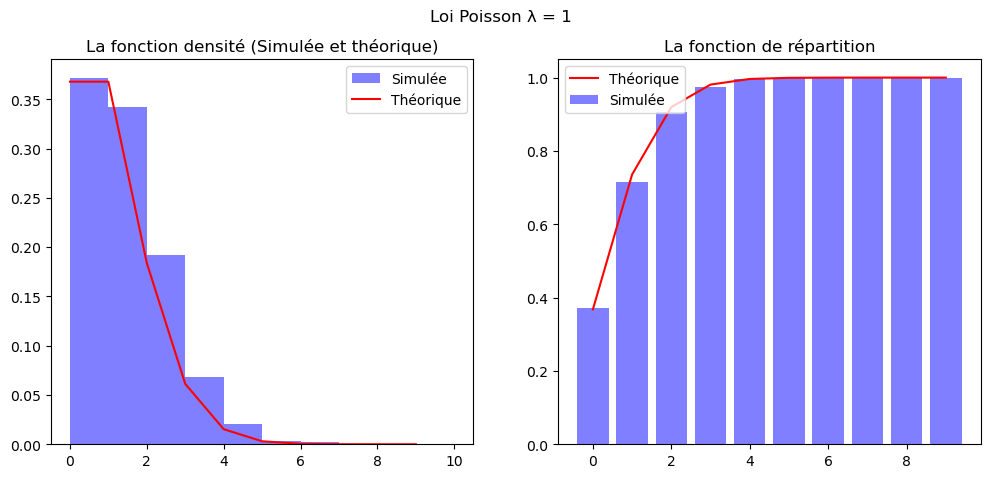

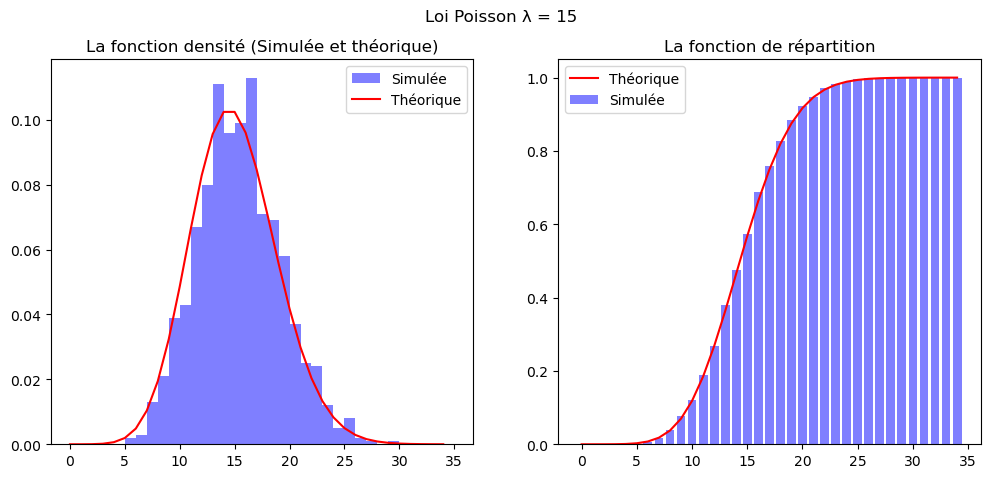

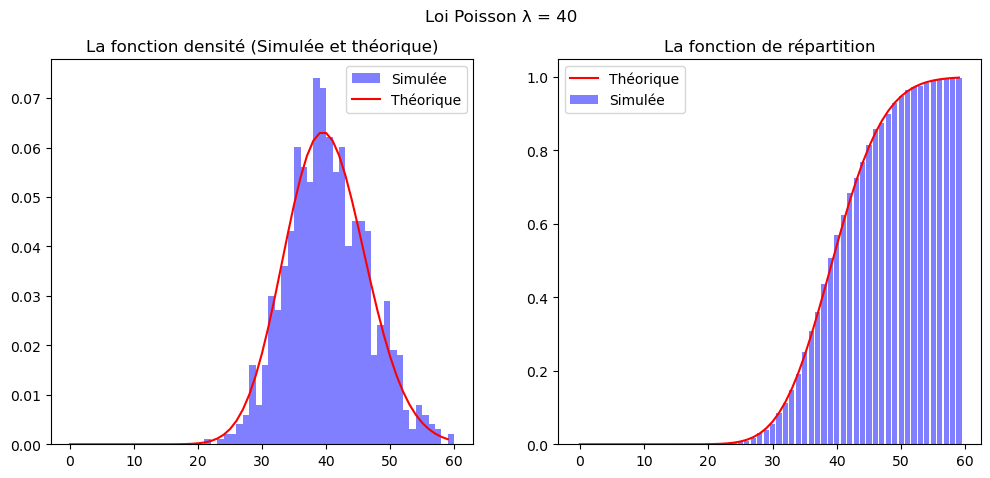

In [39]:
loi_poisson_theorique_simule(nb_essais, [1, 15, 40])

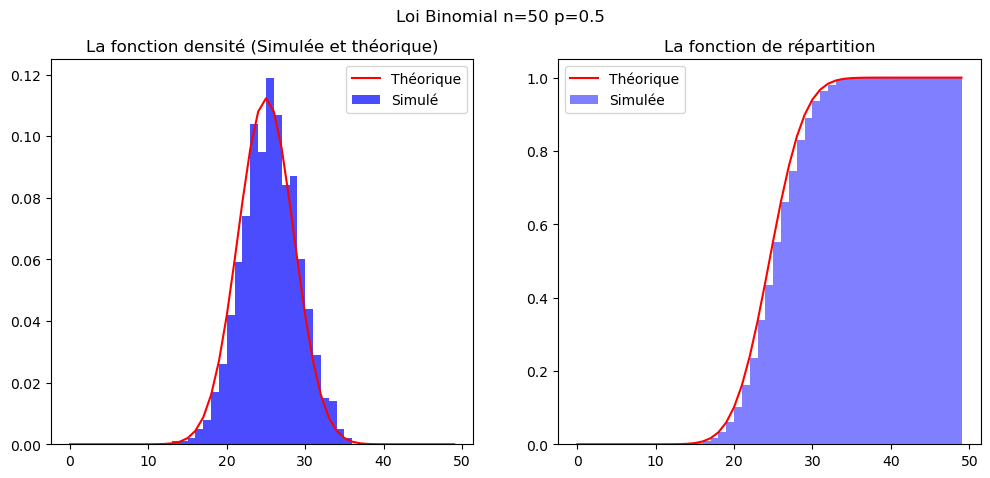

<Figure size 1200x800 with 0 Axes>

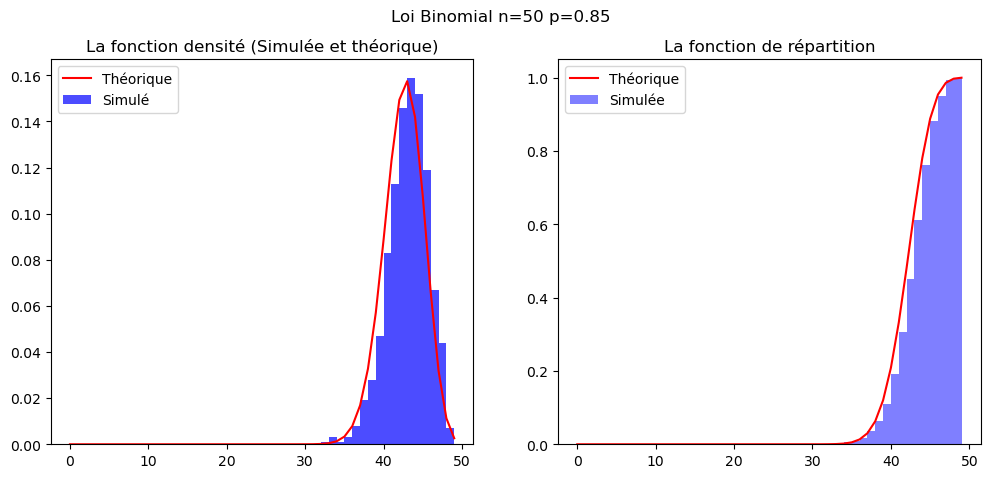

<Figure size 1200x800 with 0 Axes>

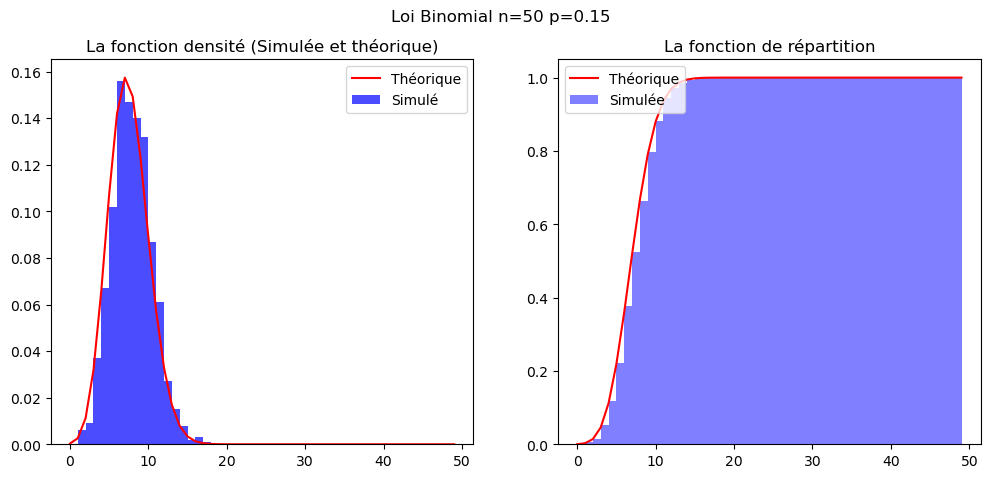

<Figure size 1200x800 with 0 Axes>

In [40]:
loi_binomial_theorique_simule([(50, 0.5),(50, 0.85), (50, 0.15)], 1000)

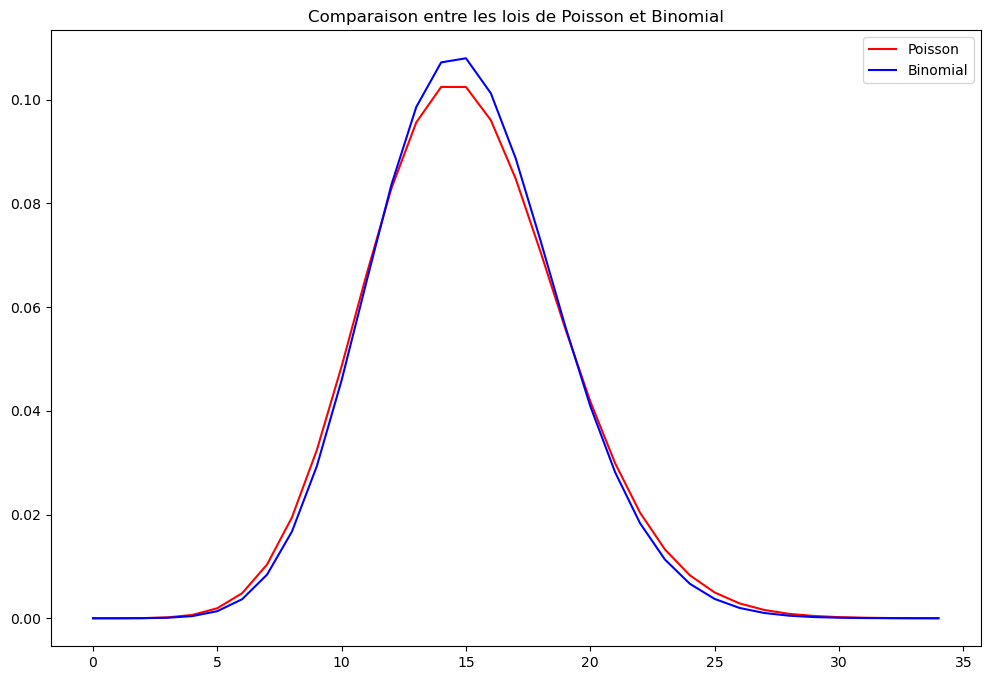

In [41]:
relation_poisson_binomial(150, 0.1)

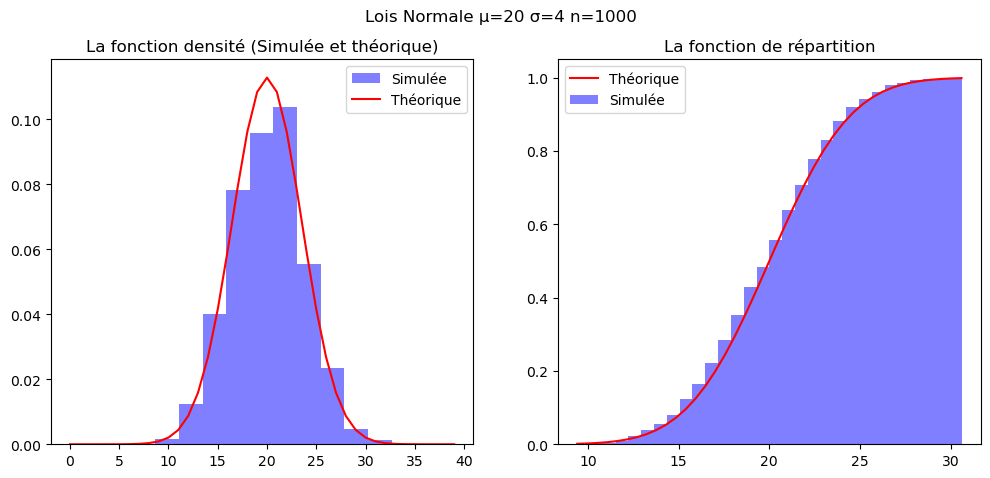

In [42]:
loi_normal_theorique_simule(nb_essais, [(20, math.sqrt(50*0.25))])

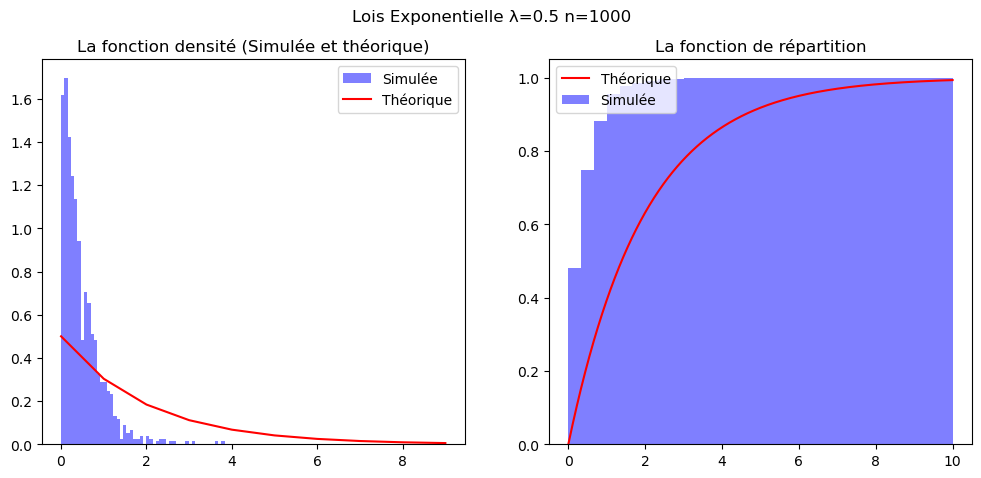

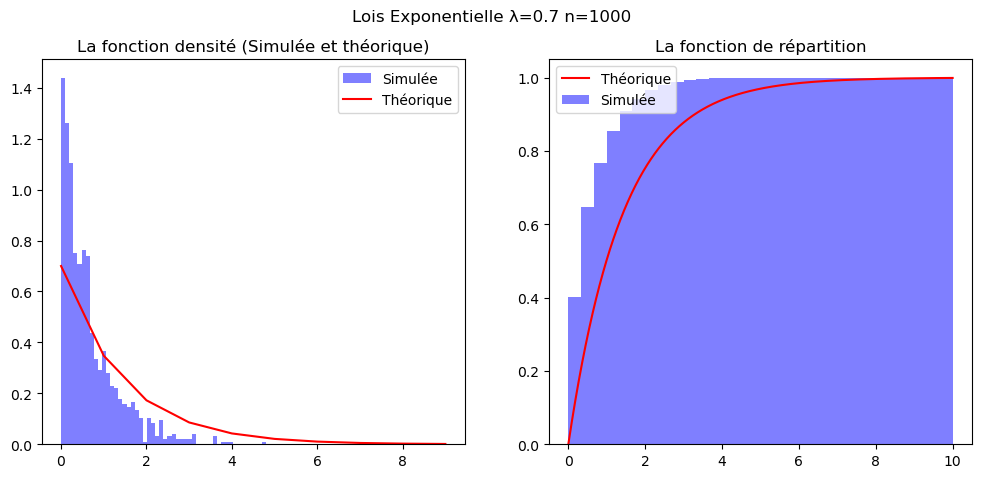

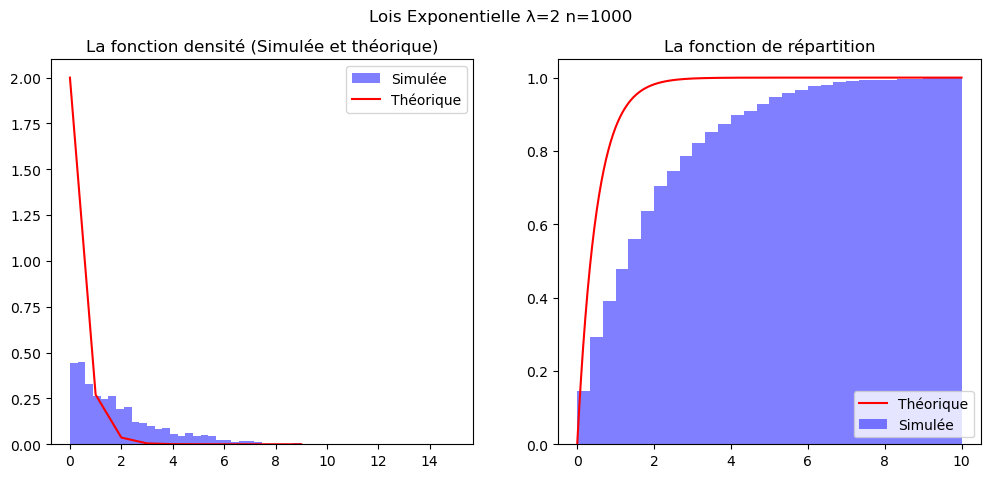

In [43]:
loi_exponential_theorique_simule(nb_essais, [0.5, 0.7, 2])

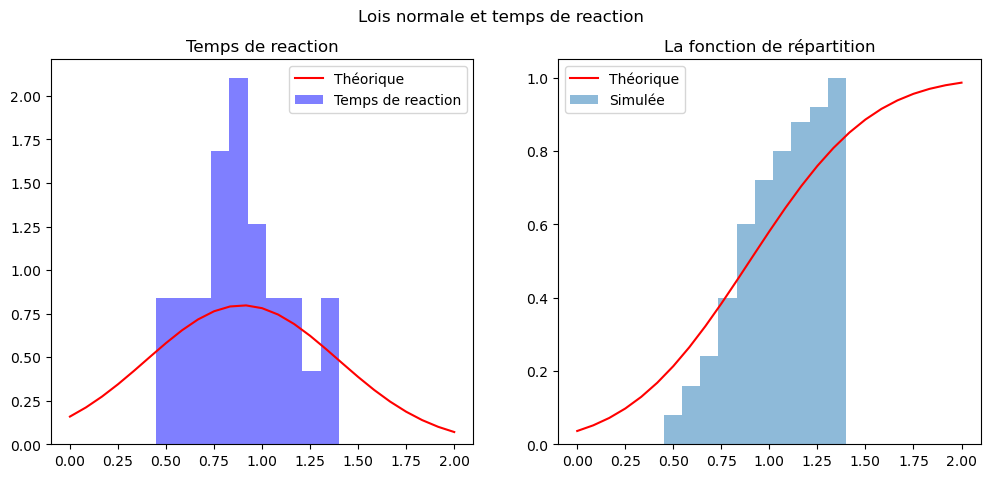

In [44]:
#Temp de temp_reaction
val = [0.98, 1.4, 0.84, 0.86, 0.54, 0.68, 1.35, 0.76, 0.79, 0.99, 0.88, 0.75, 0.45, 1.09, 0.68, 0.60, 1.13, 1.30, 1.20, 0.91, 0.74, 1.03, 0.61, 0.98, 0.91]

mu = sum(val)/len(val)
sigma = math.sqrt(0.25)

x = np.linspace(0, 2, 25)
th = [loi_normal(i, mu, sigma) for i in x]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(x, th, color='red', label="Théorique")
freq, bins, _ = ax1.hist(val, density=True, alpha=0.5, color='blue', label="Temps de reaction")
ax1.set_title("Temps de reaction")


cum_freq = np.cumsum(freq)
rep_simulee = cum_freq / cum_freq[-1]  # Normalisation pour obtenir des valeurs entre 0 et 1
bin_width = bins[1] - bins[0]  # Largeur des barres
bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Calcul des centres des intervalles


repTheo = repartition_normal(x, mu, sigma)
ax2.plot(x, repTheo, color='red', label=f'Théorique')

ax2.bar(bin_centers, rep_simulee, width=bin_width, alpha=0.5, label="Simulée", align='center')
rep = repartition_normal(x ,mu, sigma)
ax2.set_title("La fonction de répartition")
plt.suptitle("Lois normale et temps de reaction")
ax1.legend()
ax2.legend()
plt.show()

In [45]:
m_emp_temp = moeyenne_empirique(val)
v_emp_temp = math.sqrt(variance_empirique(val, m_emp_temp))

In [46]:
print("La moyenne empirique", m_emp_temp)
print("La variance empirique", round(v_emp_temp, 3))

La moyenne empirique 0.898
La variance empirique 0.251


In [47]:
print("\nEn supposant que variance² = 0.25\n---------------------------------------\n")
borne_inf, borne_sup = interval_de_confiance(val, sigma, pourcent99=False)
print("L'intervalle de confiance à 1 − α = 95%: [", round(borne_inf, 3), ",", round(borne_sup, 3), "]")
borne_inf, borne_sup = interval_de_confiance(val, sigma, pourcent99=True)
print("L'intervalle de confiance à 1 − α = 99%: [", round(borne_inf, 3), ",", round(borne_sup, 3), "]")


En supposant que variance² = 0.25
---------------------------------------

L'intervalle de confiance à 1 − α = 95%: [ 0.734 , 1.062 ]
L'intervalle de confiance à 1 − α = 99%: [ 0.665 , 1.131 ]


In [48]:
print("\nEn supposant que variance empirique = S²n\n---------------------------------------\n")
borne_inf, borne_sup = interval_de_confiance(val, sigma=None, pourcent99=False)
print("L'intervalle de confiance à 1 − α = 95%: [", round(borne_inf, 3), ",", round(borne_sup, 3), "]")
borne_inf, borne_sup = interval_de_confiance(val, sigma=None, pourcent99=True)
print("L'intervalle de confiance à 1 − α = 99%: [", round(borne_inf, 3), ",", round(borne_sup, 3), "]")


En supposant que variance empirique = S²n
---------------------------------------

L'intervalle de confiance à 1 − α = 95%: [ 0.794 , 1.002 ]
L'intervalle de confiance à 1 − α = 99%: [ 0.757 , 1.039 ]


In [49]:
# question 2.2

In [50]:
n = 1000
somme_emp = 673
moyenne_emp = 673/n
p = 0.8
a = 1 - p
a = a/2 # 10
Za = 1.3408 # on prend la valeur du fractile pour alpha = 10

borne_inf = moyenne_emp - Za * (math.sqrt(moyenne_emp*(1-moyenne_emp)/n))
borne_sup = moyenne_emp + Za * (math.sqrt(moyenne_emp*(1-moyenne_emp)/n))
interval_confiance = (borne_inf, borne_sup)

print("L'intervale de confiance a 80% de cette population vos: [", round(borne_inf, 3),",", round(borne_sup, 3), "]")


L'intervale de confiance a 80% de cette population vos: [ 0.653 , 0.693 ]
